# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_results = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
combined_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combined_results['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#combined_results[['Mouse ID', 'Timepoint']].value_counts()

duplicate_results = combined_results.loc[combined_results.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_results

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice = combined_results[combined_results["Mouse ID"].isin(duplicate_results)==True]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_results = combined_results[combined_results["Mouse ID"].isin(duplicate_results)==False]
clean_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_results['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_mean = clean_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
summary_median = clean_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary_variance = clean_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summary_stddev = clean_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
summary_sem = clean_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

single_summary = pd.concat([summary_mean, summary_median, summary_variance, summary_stddev, summary_sem], axis=1, keys=["Mean Tumor Volume", "Median Tumor Volume","Tumor Volume Variance","Tumor Volume Std. Dev.","Tumor Volume Std. Error"])
single_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_results.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var','std','sem']})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Timepoints')

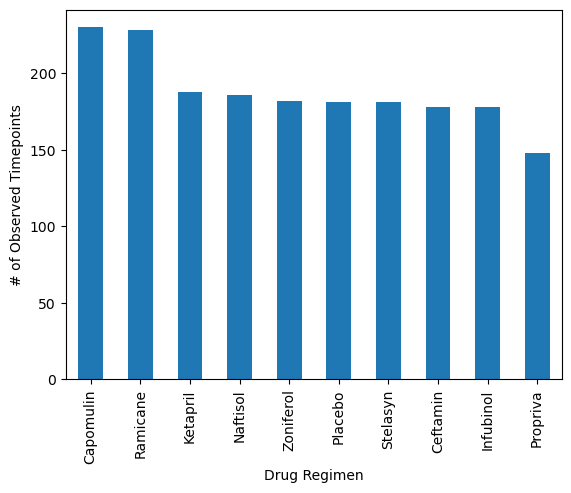

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_reg_bar = clean_results.groupby('Drug Regimen').size().sort_values(ascending=False)

ax = drug_reg_bar.plot.bar(x='Drug Regimen', y='Timepoint', rot=90, legend=False)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("# of Observed Timepoints")

Text(0, 0.5, '# of Observed Timepoints')

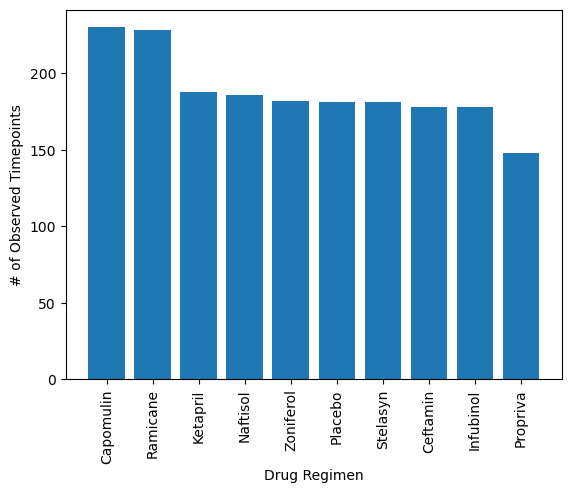

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_reg = drug_reg_bar.index.array
timepoint = drug_reg_bar

plt.bar(drug_reg, timepoint, align="center")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Timepoints")

<Axes: ylabel='Sex'>

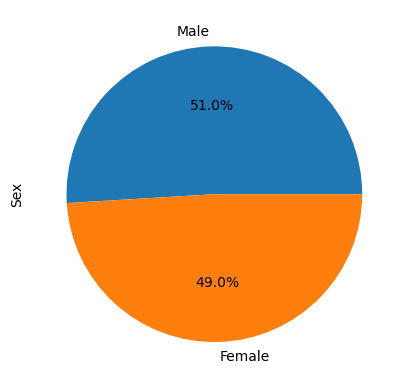

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_gender = clean_results.groupby('Sex').size().sort_values(ascending=False)

pie_gender.plot.pie(y='Sex', legend=False, autopct='%1.1f%%', ylabel="Sex")

Text(0, 0.5, 'Sex')

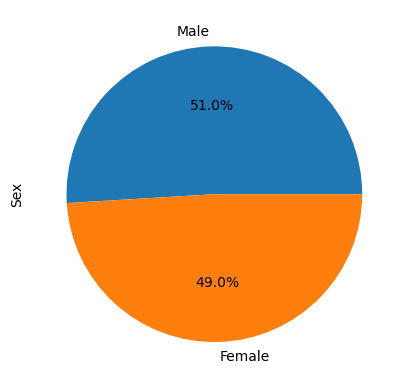

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = clean_results["Sex"].unique()
plt.pie(pie_gender, autopct="%1.1f%%", labels=labels)
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_name = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_results.groupby('Mouse ID')['Timepoint'].max()
greatest_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
clean_results_new = pd.merge(greatest_timepoint, clean_results, on=['Mouse ID', 'Timepoint'], how='left')
clean_results_new

last_tumor_vol = clean_results_new[clean_results_new['Drug Regimen'].isin(drug_name)]
#last_tumor_vol = last_tumor_vol_unsort.sort_values(by='Drug Regimen')
last_tumor_vol

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

# List of unique drug names in the DataFrame
drug_names = last_tumor_vol['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
outliers_list = []

# Iterate over each drug
for name in drug_names:
    # Filter the DataFrame for the current drug
    drug_data = last_tumor_vol[last_tumor_vol['Drug Regimen'] == name]
    
    # Calculate the first quartile (Q1) for the current drug
    Q1 = drug_data['Tumor Volume (mm3)'].quantile(0.25)

    # Calculate the third quartile (Q3) for the current drug
    Q3 = drug_data['Tumor Volume (mm3)'].quantile(0.75)

    # Calculate the Interquartile Range (IQR) for the current drug
    IQR = Q3 - Q1

    # Determine the lower and upper bounds for potential outliers for the current drug
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_data = last_tumor_vol.loc[last_tumor_vol['Drug Regimen'] == name, 'Tumor Volume (mm3)']
    
    # Check for outliers
    outliers = outlier_data[(outlier_data < lower_bound) | (outlier_data > upper_bound)]
    
    # Print treatment name and any potential outliers
    #print(f'Treatment: {drug_name}')
    if len(outliers) > 0:
        print(f'{name}s potential outliers: {outliers}')
        print('')
    else:
        print(f'No outliers found for {name}.')
        print('')

    # Append the results to the outliers list
    outliers_list.append({'Drug': name, 'Q1': Q1, 'Q3': Q3, 'IQR': IQR, 'Lower Bound': lower_bound, 'Upper Bound': upper_bound, 'Potential Outliers': outliers})

outliers_df = pd.DataFrame(outliers_list)

# Wasn't sure if this was needed
#print(outliers_df)

Infubinols potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

No outliers found for Ceftamin.

No outliers found for Ramicane.

No outliers found for Capomulin.



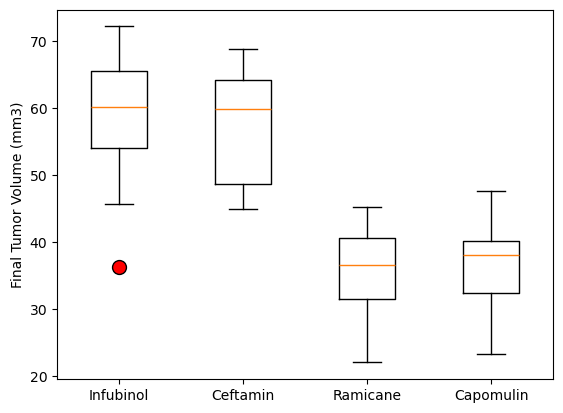

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot([last_tumor_vol[last_tumor_vol['Drug Regimen'] == drug_name]['Tumor Volume (mm3)'] for drug_name in outliers_df['Drug']], labels=outliers_df['Drug'], flierprops=dict(marker='o', markerfacecolor='red', markersize=10))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

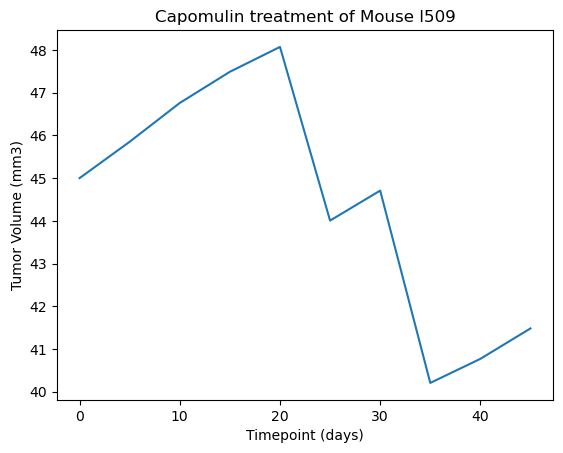

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'

mouse_data = clean_results.loc[(clean_results['Drug Regimen'] == 'Capomulin') & (clean_results['Mouse ID'] == mouse_id)]
tumor_volume = mouse_data['Tumor Volume (mm3)']
time_points = mouse_data['Timepoint']

plt.plot(time_points, tumor_volume)
plt.title('Capomulin treatment of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

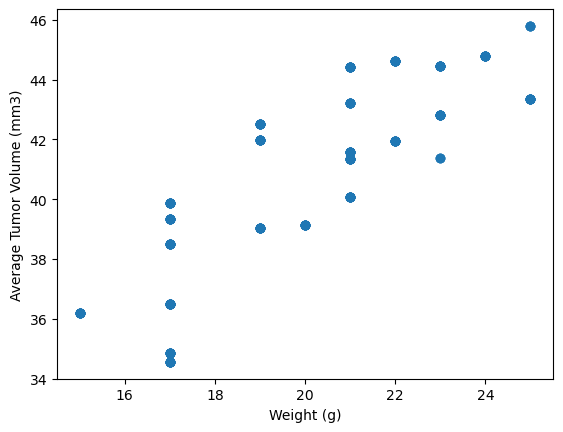

,Mouse ID,Tumor Volume (mm3)_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)_y,Metastatic Sites
0,b128,41.963636,Capomulin,Female,9,22,0,45.000000,0
1,b128,41.963636,Capomulin,Female,9,22,5,45.651331,0
2,b128,41.963636,Capomulin,Female,9,22,10,43.270852,0
3,b128,41.963636,Capomulin,Female,9,22,15,43.784893,0
4,b128,41.963636,Capomulin,Female,9,22,20,42.731552,0
...,...,...,...,...,...,...,...,...,...
225,y793,38.506829,Capomulin,Male,17,17,25,38.992734,2
226,y793,38.506829,Capomulin,Male,17,17,30,35.726023,2
227,y793,38.506829,Capomulin,Male,17,17,35,36.327870,2
228,y793,38.506829,Capomulin,Male,17,17,40,31.475411,2


In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = clean_results[clean_results['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
scatter_data = pd.merge(avg_tumor_vol, clean_results, on='Mouse ID', how='inner')


plt.scatter(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)_x'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

scatter_data

## Correlation and Regression

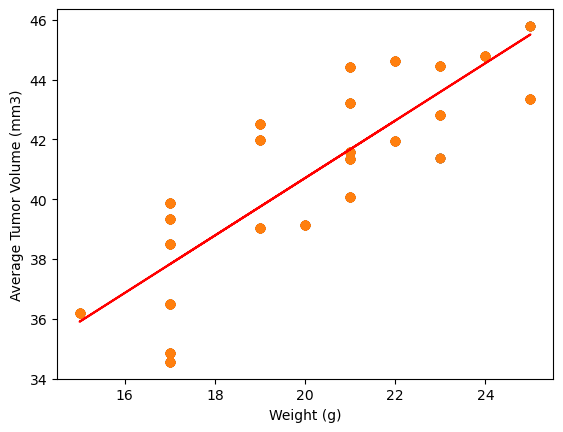

The correlation between mouse weight and the average tumor volume is 0.83.


In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import numpy as np
from scipy import stats
from scipy.stats import linregress

# Plot the linear regression line

weight = scatter_data['Weight (g)']
tumor_size = scatter_data['Tumor Volume (mm3)_x']

plt.scatter(weight, tumor_size)

slope, intercept, r_value, p_value, std_err = linregress(weight, tumor_size)

line = slope * weight + intercept

plt.scatter(weight, tumor_size)
plt.plot(weight, line, "r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

correlation_matrix = np.corrcoef(weight, tumor_size)
correlation_coefficient = correlation_matrix[0, 1]
corr_num = correlation_coefficient.round(2)

print(f'The correlation between mouse weight and the average tumor volume is {corr_num}.')